In [10]:
import pybars.charts as mygraph

In [19]:
%%sql show=df db=../../pickles/swarog_data/swarog.sqlite
select * from covid_fake_news_search limit 1

using ../../pickles/swarog_data/swarog.sqlite


,label,body
0,1,A post claims compulsory vacination violates t...


In [21]:
%%sql show=df db=../../pickles/swarog_data/graph.sqlite
select * from nodes limit 10

using ../../pickles/swarog_data/graph.sqlite


,body,type,id
0,"{""id"": 1, ""body"": ""A post claims compulsory va...",document,1
1,"{""id"": 2, ""body"": ""A photo claims that this pe...",document,2
2,"{""id"": 3, ""body"": ""Post about a video claims t...",document,3
3,"{""id"": 4, ""body"": ""All deaths by respiratory f...",document,4
4,"{""id"": 5, ""body"": ""The dean of the College of ...",document,5
5,"{""id"": 6, ""body"": ""Households with COVID-19 pa...",document,6
6,"{""id"": 7, ""body"": ""A chain lists recommendatio...",document,7
7,"{""id"": 8, ""body"": ""60,000 Argentinian companie...",document,8
8,"{""id"": 9, ""body"": ""Social media posts criticiz...",document,9
9,"{""id"": 10, ""body"": ""CDC has released an update...",document,10


In [34]:
%%sql show=df db=../../pickles/swarog_data/graph.sqlite
select 
    source, count(*), target,
--    json_extract(properties, '$.hit_count') as hits , 
    json_extract(properties, '$.distance') as distance 
from edges 
where 1
and source<>target 
group by 1
order by 2 desc
limit 30

using ../../pickles/swarog_data/graph.sqlite


,source,count(*),target,distance
0,263,10,1924,0.500000
1,2935,10,1511,0.285714
2,3518,10,2188,0.571429
3,3544,10,1152,0.714286
4,8194,10,1171,0.400000
5,8617,10,2897,0.000000
6,1,9,1935,0.857143
7,10,9,1746,0.571429
8,100,9,109,0.571429
9,1000,9,104,0.857143


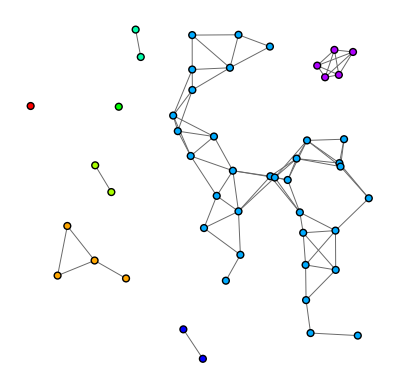

In [33]:
import igraph as ig
import matplotlib.pyplot as plt
import random

random.seed(0)
g = ig.Graph.GRG(50, 0.15)
components = g.connected_components(mode='weak')

fig, ax = plt.subplots()
ig.plot(
    components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.02,
    vertex_color=list(map(int, ig.rescale(components.membership, (0, 200), clamp=True))),
    edge_width=0.7
)
plt.show()